📊 카테고리별 인기 분석	카테고리별 찜 수, 클릭 수, 구매 수 비교	- 카테고리별 찜 수

[KPI지표]
- 카테고리별 클릭 수
- 카테고리별 공구 수

[운영 인사이트]
- 인기 카테고리 우선 배치 및 마케팅 대상

[출처 테이블]
- product
- group_product
- category

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
products_df = pd.read_csv('/content/products_df_final.csv')
group_products_df = pd.read_csv('/content/group_product_df_final.csv')

# 데이터 기본 정보 확인
print("=== Products DataFrame ===")
print(f"Shape: {products_df.shape}")
print(products_df.head())
print(f"\nColumns: {products_df.columns.tolist()}")
print(f"\nData types:")
print(products_df.dtypes)

print("\n=== Group Products DataFrame ===")
print(f"Shape: {group_products_df.shape}")
print(group_products_df.head())
print(f"\nColumns: {group_products_df.columns.tolist()}")
print(f"\nData types:")
print(group_products_df.dtypes)

# category_id로 조인
merged_df = pd.merge(products_df, group_products_df, on='category_id', how='inner')
print(f"\n=== Merged DataFrame ===")
print(f"Shape after join: {merged_df.shape}")
print(merged_df.head())

# 결측값 확인
print(f"\n=== Missing Values ===")
print(merged_df.isnull().sum())

# 기본 통계
print(f"\n=== Basic Statistics ===")
print(merged_df.describe())

=== Products DataFrame ===
Shape: (200, 8)
   product_id  name  price                             img_url  rating  \
0           1  상품_1  93810  https://www.lorempixel.com/200/200     2.7   
1           2  상품_2  24592  https://www.lorempixel.com/200/200     1.8   
2           3  상품_3  13278     https://placekitten.com/200/200     3.2   
3           4  상품_4  46048      https://dummyimage.com/200x200     3.9   
4           5  상품_5  42098      https://dummyimage.com/200x200     1.8   

                 product_url  created_at  category_id  
0  http://www.jusighoesa.kr/  2025-03-03           25  
1    http://www.giminam.org/  2024-11-10           23  
2      https://hanseoan.net/  2024-08-01           21  
3        https://www.yu.com/  2025-02-20           31  
4             http://ju.com/  2024-11-17           32  

Columns: ['product_id', 'name', 'price', 'img_url', 'rating', 'product_url', 'created_at', 'category_id']

Data types:
product_id       int64
name            object
price     

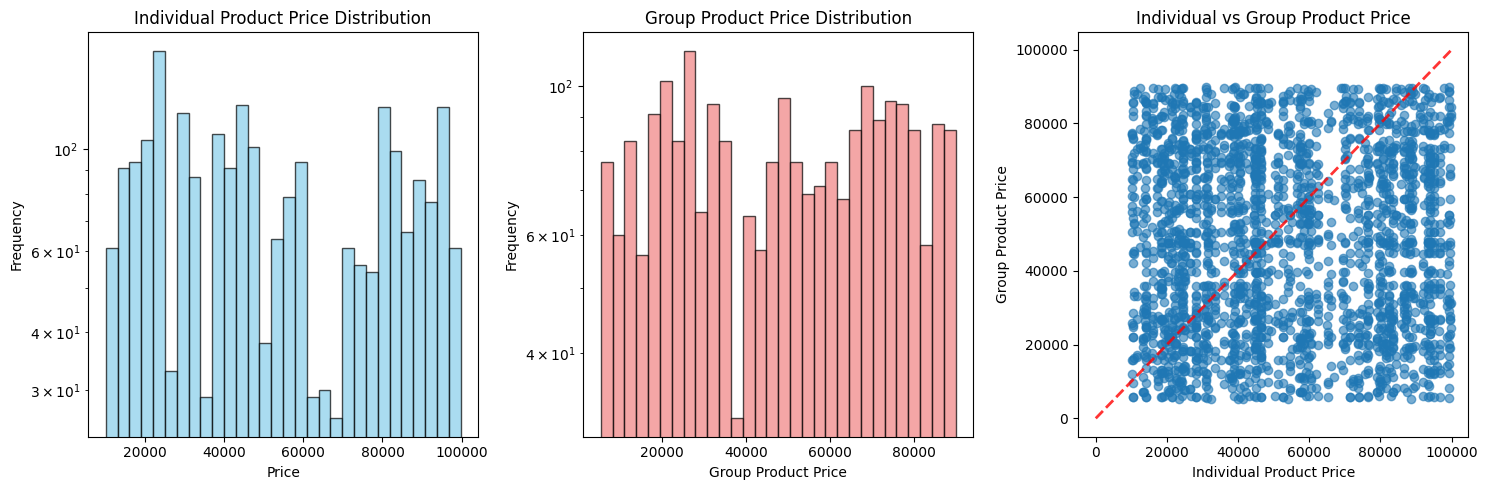

Price difference statistics:
Mean difference: -4837.04
Median difference: -5219.00
Mean ratio: 1.30
Median ratio: 0.90


In [ ]:
# 개별 상품 가격과 그룹 상품 가격 분포 비교
plt.figure(figsize=(15, 5))

# 개별 상품 가격 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Individual Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')

# 그룹 상품 가격 분포
plt.subplot(1, 3, 2)
plt.hist(merged_df['group_product_price'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Group Product Price Distribution')
plt.xlabel('Group Product Price')
plt.ylabel('Frequency')
plt.yscale('log')

# 가격 비교 산점도
plt.subplot(1, 3, 3)
plt.scatter(merged_df['price'], merged_df['group_product_price'], alpha=0.6)
plt.plot([0, merged_df[['price', 'group_product_price']].max().max()],
         [0, merged_df[['price', 'group_product_price']].max().max()],
         'r--', alpha=0.8, linewidth=2)
plt.xlabel('Individual Product Price')
plt.ylabel('Group Product Price')
plt.title('Individual vs Group Product Price')

plt.tight_layout()
plt.show()

# 가격 차이 계산
merged_df['price_difference'] = merged_df['group_product_price'] - merged_df['price']
merged_df['price_ratio'] = merged_df['group_product_price'] / merged_df['price']

print(f"Price difference statistics:")
print(f"Mean difference: {merged_df['price_difference'].mean():.2f}")
print(f"Median difference: {merged_df['price_difference'].median():.2f}")
print(f"Mean ratio: {merged_df['price_ratio'].mean():.2f}")
print(f"Median ratio: {merged_df['price_ratio'].median():.2f}")

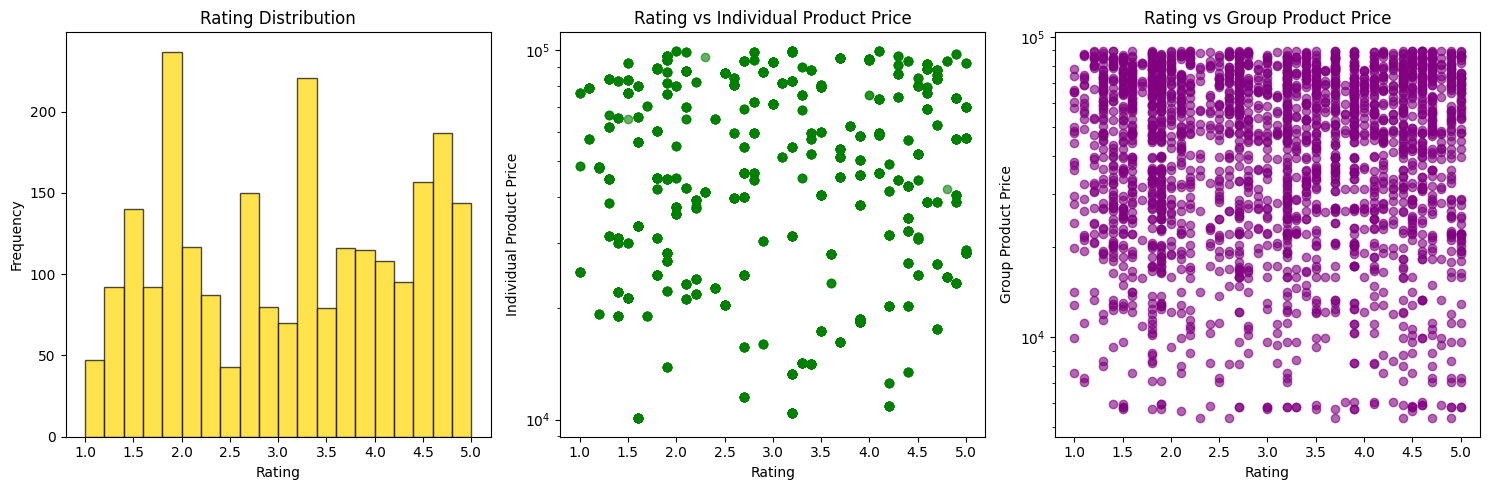

Rating group statistics:
              price                group_product_price          quantity  \
               mean   median count                mean   median     mean   
rating                                                                     
Very Low   49836.30  45093.0   476            47511.13  47046.5    49.17   
Low        54298.92  42325.0   429            48103.96  48370.0    50.36   
Medium     55764.55  54597.0   471            48129.03  47960.0    48.39   
High       49670.23  46463.0   474            48381.50  48727.0    49.86   
Very High  55911.13  57052.0   527            49220.35  49208.0    46.54   

                  
          median  
rating            
Very Low    52.0  
Low         51.0  
Medium      49.0  
High        52.5  
Very High   44.0  


In [ ]:
# 평점 분석
plt.figure(figsize=(15, 5))

# 평점 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['rating'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# 평점과 개별 상품 가격의 관계
plt.subplot(1, 3, 2)
plt.scatter(merged_df['rating'], merged_df['price'], alpha=0.6, color='green')
plt.xlabel('Rating')
plt.ylabel('Individual Product Price')
plt.title('Rating vs Individual Product Price')
plt.yscale('log')

# 평점과 그룹 상품 가격의 관계
plt.subplot(1, 3, 3)
plt.scatter(merged_df['rating'], merged_df['group_product_price'], alpha=0.6, color='purple')
plt.xlabel('Rating')
plt.ylabel('Group Product Price')
plt.title('Rating vs Group Product Price')
plt.yscale('log')

plt.tight_layout()
plt.show()

# 평점 구간별 통계
rating_bins = pd.cut(merged_df['rating'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
rating_stats = merged_df.groupby(rating_bins).agg({
    'price': ['mean', 'median', 'count'],
    'group_product_price': ['mean', 'median'],
    'quantity': ['mean', 'median']
}).round(2)

print("Rating group statistics:")
print(rating_stats)

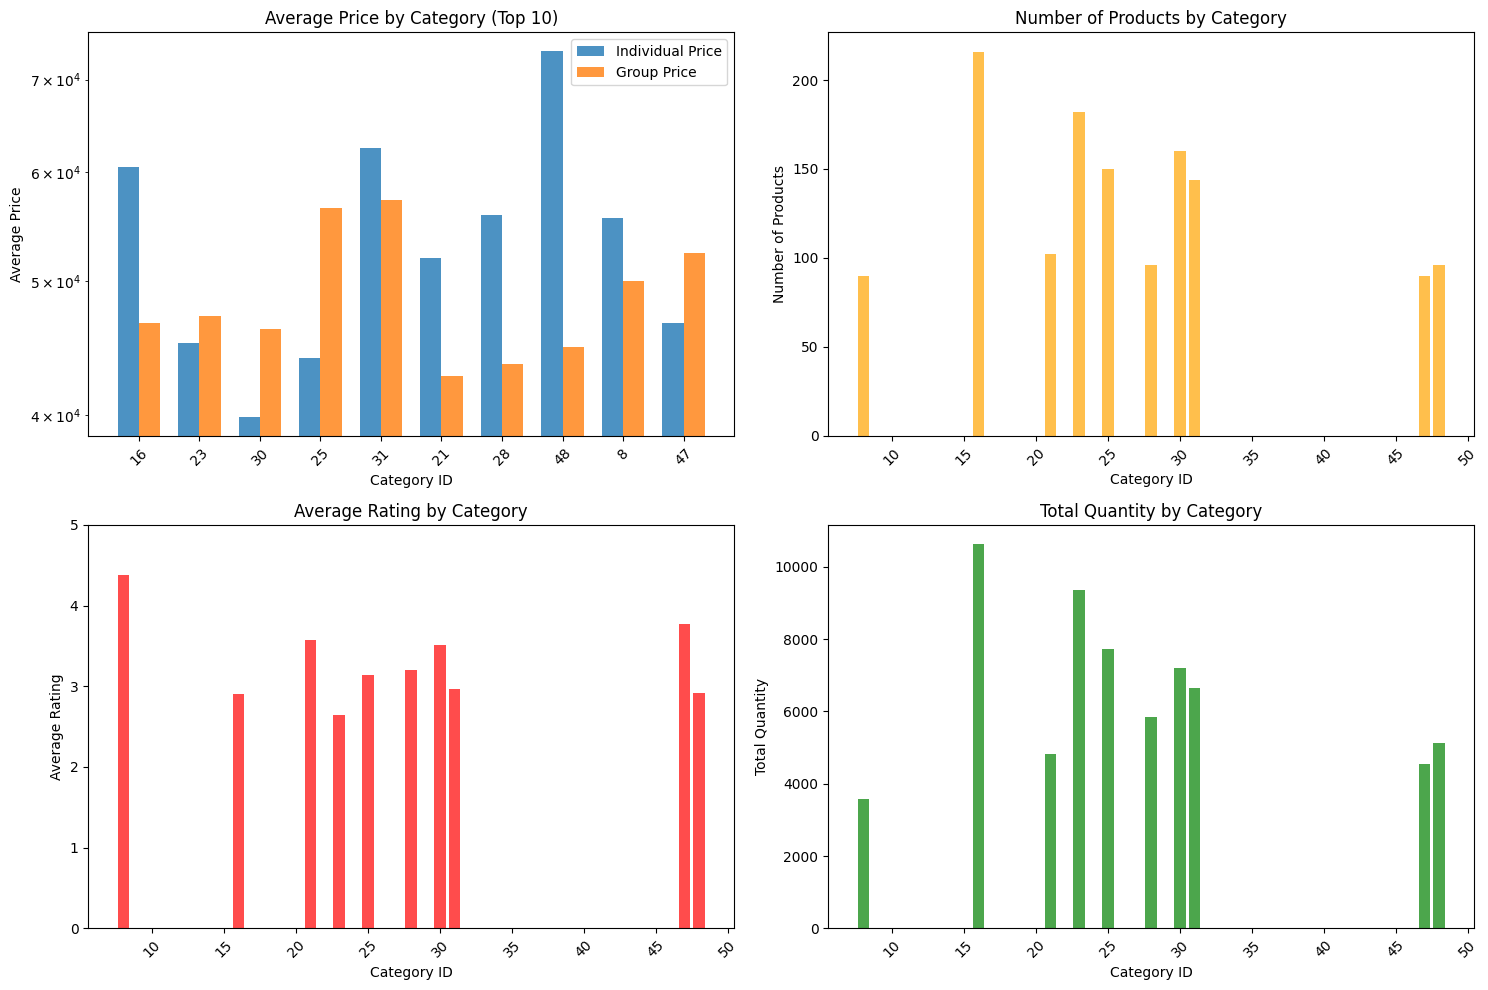

Top 10 categories by number of products:
                price                          group_product_price           \
                 mean   median       std count                mean   median   
category_id                                                                   
16           60526.50  60817.5  31706.55   216            46638.15  46599.0   
23           45130.86  33416.0  26558.33   182            47184.58  42510.5   
30           39826.75  37355.0  23423.16   160            46136.80  43615.5   
25           43972.60  36428.0  27544.92   150            56488.93  62458.0   
31           62475.38  63354.0  21868.61   144            57212.22  61904.0   
21           51949.50  57609.5  26878.92   102            42678.65  49208.0   
28           55838.33  59476.0  20167.74    96            43560.56  48892.5   
48           73464.67  85399.5  25859.90    96            44830.31  45977.5   
8            55516.40  42953.0  25880.39    90            50017.22  43421.5   
47         

In [ ]:
# 카테고리별 분석
category_stats = merged_df.groupby('category_id').agg({
    'price': ['mean', 'median', 'std', 'count'],
    'group_product_price': ['mean', 'median', 'std'],
    'rating': ['mean', 'median', 'std'],
    'quantity': ['mean', 'median', 'sum']
}).round(2)

# 상위 10개 카테고리 (상품 수 기준)
top_categories = category_stats.sort_values(('price', 'count'), ascending=False).head(10)

plt.figure(figsize=(15, 10))

# 카테고리별 평균 가격 비교
plt.subplot(2, 2, 1)
categories = top_categories.index
individual_prices = top_categories[('price', 'mean')]
group_prices = top_categories[('group_product_price', 'mean')]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, individual_prices, width, label='Individual Price', alpha=0.8)
plt.bar(x + width/2, group_prices, width, label='Group Price', alpha=0.8)
plt.xlabel('Category ID')
plt.ylabel('Average Price')
plt.title('Average Price by Category (Top 10)')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.yscale('log')

# 카테고리별 상품 수
plt.subplot(2, 2, 2)
product_counts = top_categories[('price', 'count')]
plt.bar(categories, product_counts, alpha=0.7, color='orange')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.title('Number of Products by Category')
plt.xticks(rotation=45)

# 카테고리별 평균 평점
plt.subplot(2, 2, 3)
avg_ratings = top_categories[('rating', 'mean')]
plt.bar(categories, avg_ratings, alpha=0.7, color='red')
plt.xlabel('Category ID')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=45)
plt.ylim(0, 5)

# 카테고리별 총 수량
plt.subplot(2, 2, 4)
total_quantities = top_categories[('quantity', 'sum')]
plt.bar(categories, total_quantities, alpha=0.7, color='green')
plt.xlabel('Category ID')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Top 10 categories by number of products:")
print(category_stats.sort_values(('price', 'count'), ascending=False).head(10))

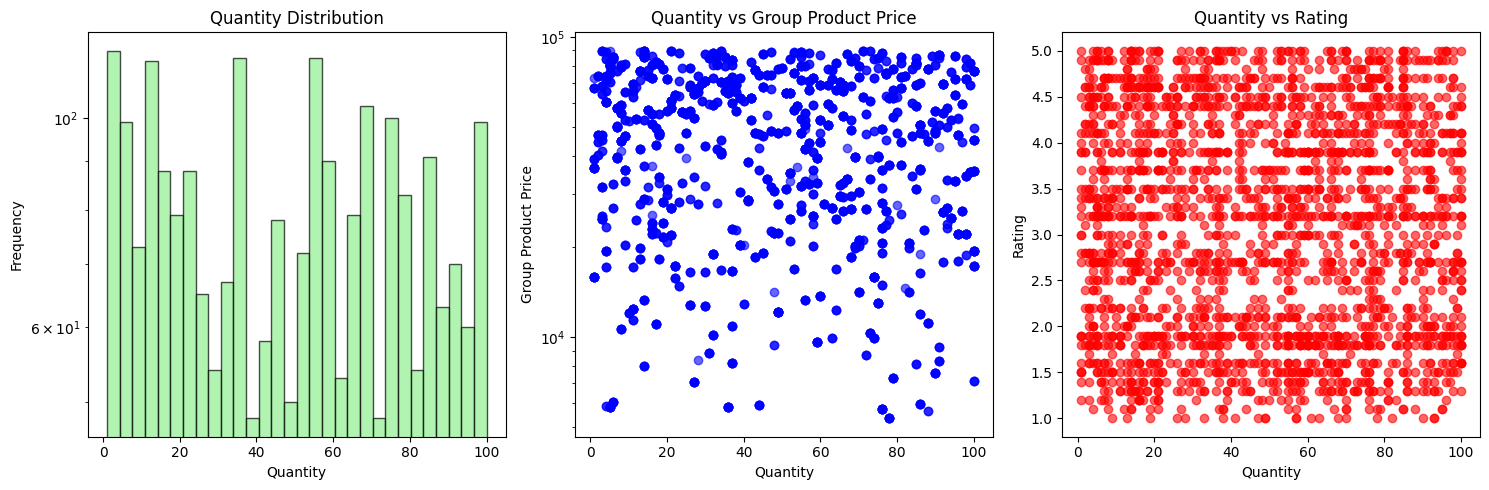

Quantity group statistics:
              price          group_product_price          rating         \
               mean   median                mean   median   mean median   
quantity                                                                  
Very Low   52739.00  47930.0            50997.68  51381.0   3.12    3.2   
Low        53534.17  46463.0            50116.45  56445.0   3.17    3.2   
Medium     50490.17  46421.0            48061.60  47655.0   3.02    3.1   
High       55875.46  51347.0            44512.66  39832.0   3.06    3.2   
Very High  53088.68  49117.0            47629.21  47726.0   3.09    3.2   

          quantity                    
               min  max   mean count  
quantity                              
Very Low         1   17   8.97   493  
Low             18   37  27.75   469  
Medium          38   59  49.70   477  
High            60   78  69.40   467  
Very High       79  100  90.02   471  


In [ ]:
# 수량 분석
plt.figure(figsize=(15, 5))

# 수량 분포
plt.subplot(1, 3, 1)
plt.hist(merged_df['quantity'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.yscale('log')

# 수량과 그룹 상품 가격의 관계
plt.subplot(1, 3, 2)
plt.scatter(merged_df['quantity'], merged_df['group_product_price'], alpha=0.6, color='blue')
plt.xlabel('Quantity')
plt.ylabel('Group Product Price')
plt.title('Quantity vs Group Product Price')
plt.yscale('log')

# 수량과 평점의 관계
plt.subplot(1, 3, 3)
plt.scatter(merged_df['quantity'], merged_df['rating'], alpha=0.6, color='red')
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.title('Quantity vs Rating')

plt.tight_layout()
plt.show()

# 수량 구간별 통계
quantity_bins = pd.qcut(merged_df['quantity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
quantity_stats = merged_df.groupby(quantity_bins).agg({
    'price': ['mean', 'median'],
    'group_product_price': ['mean', 'median'],
    'rating': ['mean', 'median'],
    'quantity': ['min', 'max', 'mean', 'count']
}).round(2)

print("Quantity group statistics:")
print(quantity_stats)

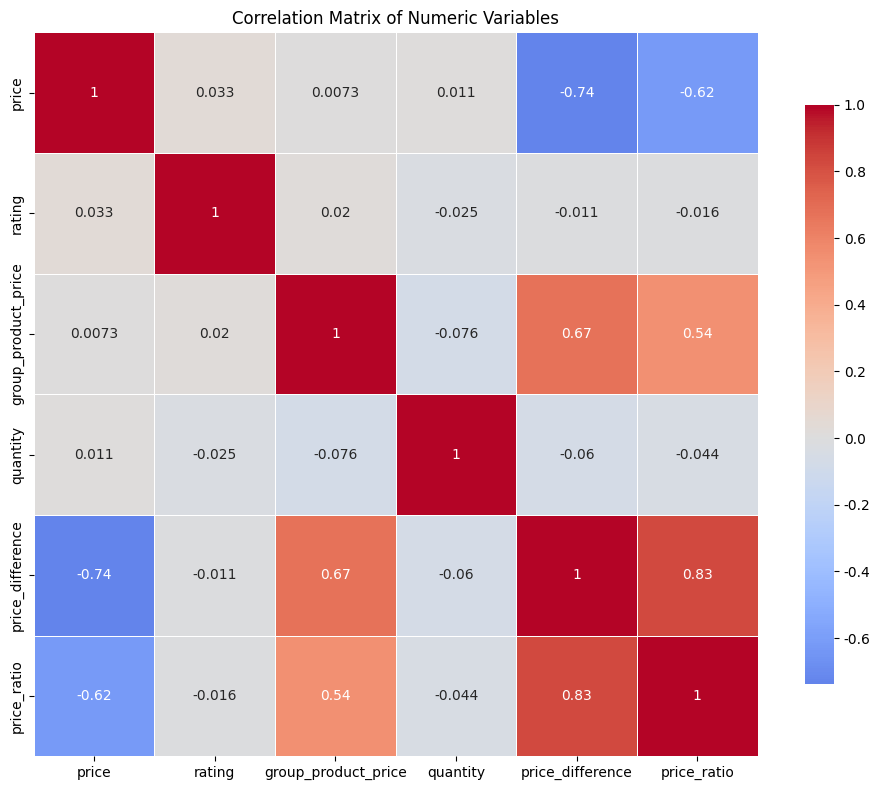

Strong correlations (|r| > 0.3):
            Variable 1        Variable 2  Correlation
4     price_difference       price_ratio        0.826
0                price  price_difference       -0.737
2  group_product_price  price_difference        0.671
1                price       price_ratio       -0.620
3  group_product_price       price_ratio        0.541


In [ ]:
# 상관관계 분석
numeric_columns = ['price', 'rating', 'group_product_price', 'quantity', 'price_difference', 'price_ratio']
correlation_matrix = merged_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# 강한 상관관계 쌍 찾기
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # 0.3 이상의 상관관계
            correlation_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': round(corr_value, 3)
            })

correlation_df = pd.DataFrame(correlation_pairs).sort_values('Correlation', key=abs, ascending=False)
print("Strong correlations (|r| > 0.3):")
print(correlation_df)

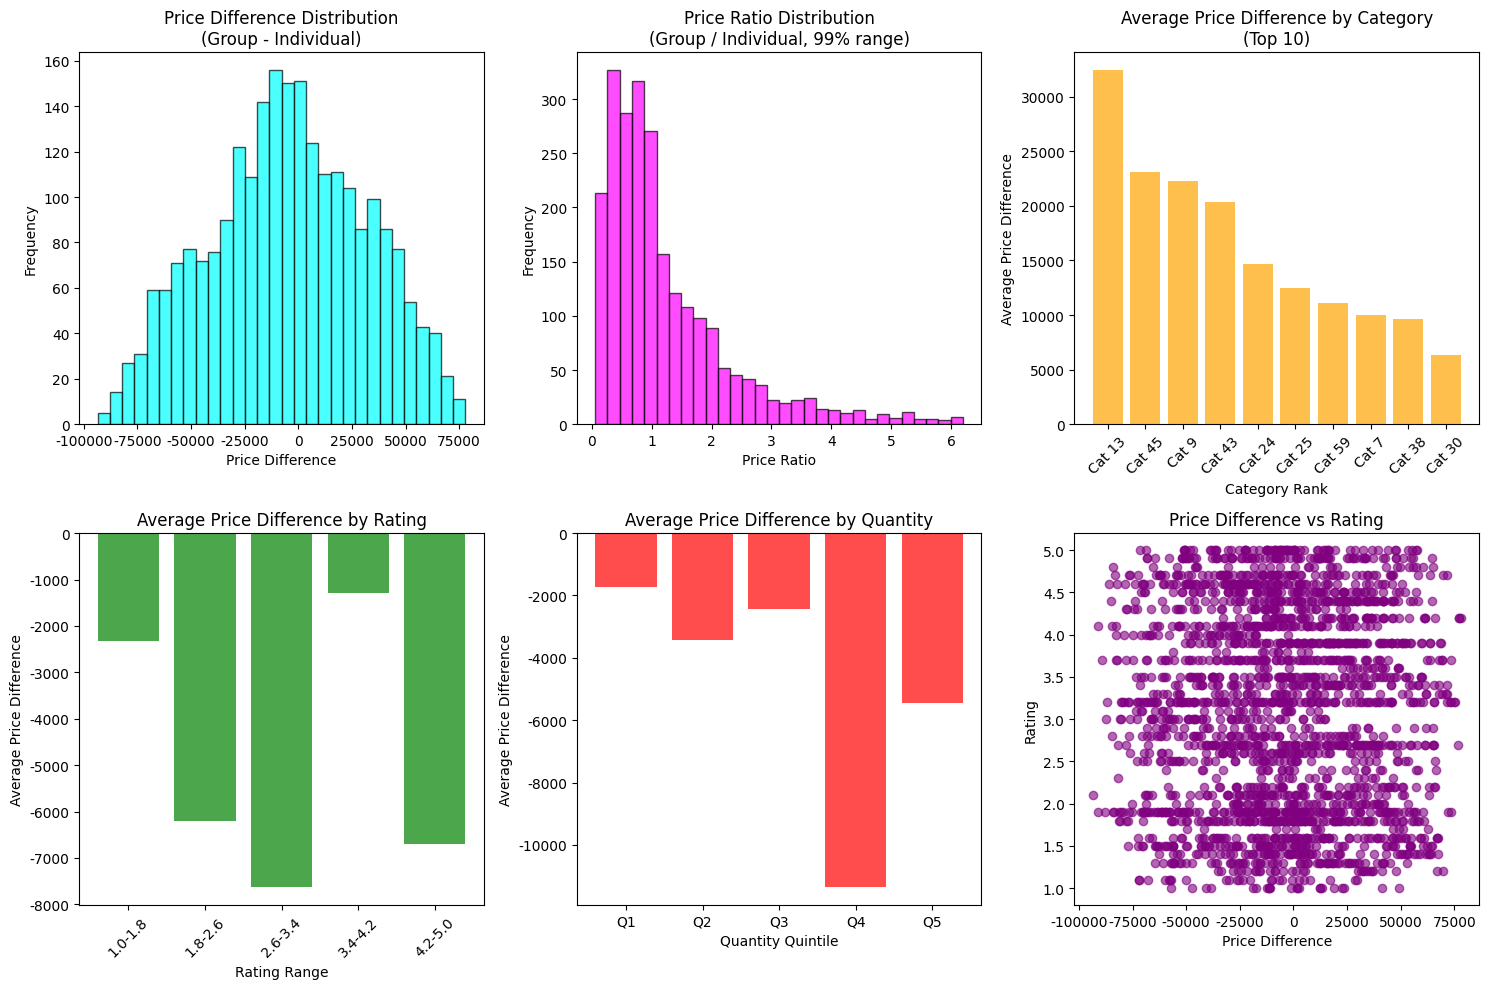

Price difference analysis:
Products where group price > individual price: 1062 (44.7%)
Products where group price < individual price: 1315 (55.3%)
Products where group price = individual price: 0 (0.0%)

Largest price increases (top 5):
      product_id  category_id  price  group_product_price  price_difference
400           31           11  10851                88776             77925
406           31           11  10851                88006             77155
2152         179           24  12552                89594             77042
1738         145           45  11504                88023             76519
1869         158           30  10425                85859             75434

Largest price decreases (top 5):
      product_id  category_id  price  group_product_price  price_difference
1749         146           40  99166                 5643            -93523
1769         148           17  99353                 8149            -91204
743           62           16  96673         

In [ ]:
# 가격 차이 심화 분석
plt.figure(figsize=(15, 10))

# 가격 차이 분포
plt.subplot(2, 3, 1)
plt.hist(merged_df['price_difference'], bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.title('Price Difference Distribution\n(Group - Individual)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')

# 가격 비율 분포
plt.subplot(2, 3, 2)
# 극값 제거를 위해 99% 범위만 표시
price_ratio_99 = merged_df['price_ratio'].quantile(0.99)
filtered_ratio = merged_df[merged_df['price_ratio'] <= price_ratio_99]['price_ratio']
plt.hist(filtered_ratio, bins=30, alpha=0.7, color='magenta', edgecolor='black')
plt.title('Price Ratio Distribution\n(Group / Individual, 99% range)')
plt.xlabel('Price Ratio')
plt.ylabel('Frequency')

# 카테고리별 평균 가격 차이
plt.subplot(2, 3, 3)
category_price_diff = merged_df.groupby('category_id')['price_difference'].mean().sort_values(ascending=False).head(10)
plt.bar(range(len(category_price_diff)), category_price_diff.values, alpha=0.7, color='orange')
plt.title('Average Price Difference by Category\n(Top 10)')
plt.xlabel('Category Rank')
plt.ylabel('Average Price Difference')
plt.xticks(range(len(category_price_diff)), [f'Cat {cat}' for cat in category_price_diff.index], rotation=45)

# 평점별 가격 차이
plt.subplot(2, 3, 4)
rating_bins = pd.cut(merged_df['rating'], bins=5)
price_diff_by_rating = merged_df.groupby(rating_bins)['price_difference'].mean()
plt.bar(range(len(price_diff_by_rating)), price_diff_by_rating.values, alpha=0.7, color='green')
plt.title('Average Price Difference by Rating')
plt.xlabel('Rating Range')
plt.ylabel('Average Price Difference')
plt.xticks(range(len(price_diff_by_rating)), [f'{interval.left:.1f}-{interval.right:.1f}' for interval in price_diff_by_rating.index], rotation=45)

# 수량별 가격 차이
plt.subplot(2, 3, 5)
quantity_bins = pd.qcut(merged_df['quantity'], q=5)
price_diff_by_quantity = merged_df.groupby(quantity_bins)['price_difference'].mean()
plt.bar(range(len(price_diff_by_quantity)), price_diff_by_quantity.values, alpha=0.7, color='red')
plt.title('Average Price Difference by Quantity')
plt.xlabel('Quantity Quintile')
plt.ylabel('Average Price Difference')
plt.xticks(range(len(price_diff_by_quantity)), ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 가격 차이와 평점의 관계
plt.subplot(2, 3, 6)
plt.scatter(merged_df['price_difference'], merged_df['rating'], alpha=0.6, color='purple')
plt.xlabel('Price Difference')
plt.ylabel('Rating')
plt.title('Price Difference vs Rating')

plt.tight_layout()
plt.show()

# 가격 차이 통계
print("Price difference analysis:")
print(f"Products where group price > individual price: {(merged_df['price_difference'] > 0).sum()} ({(merged_df['price_difference'] > 0).mean()*100:.1f}%)")
print(f"Products where group price < individual price: {(merged_df['price_difference'] < 0).sum()} ({(merged_df['price_difference'] < 0).mean()*100:.1f}%)")
print(f"Products where group price = individual price: {(merged_df['price_difference'] == 0).sum()} ({(merged_df['price_difference'] == 0).mean()*100:.1f}%)")

print(f"\nLargest price increases (top 5):")
print(merged_df.nlargest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])

print(f"\nLargest price decreases (top 5):")
print(merged_df.nsmallest(5, 'price_difference')[['product_id', 'category_id', 'price', 'group_product_price', 'price_difference']])

In [ ]:
# 종합 요약 및 주요 인사이트
print("="*50)
print("EDA 종합 요약 및 주요 인사이트")
print("="*50)

print(f"\n1. 데이터 개요:")
print(f"   - 총 상품 수: {len(merged_df):,}")
print(f"   - 카테고리 수: {merged_df['category_id'].nunique()}")
print(f"   - 조인 성공률: {len(merged_df)/len(products_df)*100:.1f}%")

print(f"\n2. 가격 분석:")
print(f"   - 개별 상품 평균 가격: {merged_df['price'].mean():,.0f}")
print(f"   - 그룹 상품 평균 가격: {merged_df['group_product_price'].mean():,.0f}")
print(f"   - 평균 가격 차이: {merged_df['price_difference'].mean():,.0f}")
print(f"   - 그룹 가격이 더 높은 상품 비율: {(merged_df['price_difference'] > 0).mean()*100:.1f}%")

print(f"\n3. 평점 분석:")
print(f"   - 평균 평점: {merged_df['rating'].mean():.2f}")
print(f"   - 평점 표준편차: {merged_df['rating'].std():.2f}")
print(f"   - 최고 평점: {merged_df['rating'].max()}")
print(f"   - 최저 평점: {merged_df['rating'].min()}")

print(f"\n4. 수량 분석:")
print(f"   - 평균 수량: {merged_df['quantity'].mean():.1f}")
print(f"   - 수량 중앙값: {merged_df['quantity'].median():.1f}")
print(f"   - 최대 수량: {merged_df['quantity'].max()}")

print(f"\n5. 카테고리 분석:")
top_5_categories = merged_df['category_id'].value_counts().head(5)
print(f"   - 상위 5개 카테고리 (상품 수):")
for cat, count in top_5_categories.items():
    print(f"     카테고리 {cat}: {count}개 상품")

print(f"\n6. 주요 발견사항:")
# 상관관계 기반 인사이트
price_rating_corr = merged_df['price'].corr(merged_df['rating'])
quantity_price_corr = merged_df['quantity'].corr(merged_df['group_product_price'])

print(f"   - 개별 상품 가격과 평점의 상관관계: {price_rating_corr:.3f}")
print(f"   - 수량과 그룹 가격의 상관관계: {quantity_price_corr:.3f}")

# 가격 차이 패턴
high_rating_price_diff = merged_df[merged_df['rating'] >= 4]['price_difference'].mean()
low_rating_price_diff = merged_df[merged_df['rating'] < 3]['price_difference'].mean()

print(f"   - 고평점 상품(4+)의 평균 가격 차이: {high_rating_price_diff:,.0f}")
print(f"   - 저평점 상품(3미만)의 평균 가격 차이: {low_rating_price_diff:,.0f}")

print(f"\n7. 비즈니스 함의:")
print(f"   - 그룹 구매 시 가격 할인 효과가 있는 상품들이 존재")
print(f"   - 카테고리별로 가격 패턴이 다름")
print(f"   - 평점과 가격 간의 관계 분석 필요")
print(f"   - 수량에 따른 가격 최적화 기회 존재")

# 최종 데이터 요약 테이블
print(f"\n8. 최종 통계 요약:")
summary_stats = merged_df[['price', 'group_product_price', 'rating', 'quantity', 'price_difference']].describe()
print(summary_stats.round(2))

EDA 종합 요약 및 주요 인사이트

1. 데이터 개요:
   - 총 상품 수: 2,377
   - 카테고리 수: 55
   - 조인 성공률: 1188.5%

2. 가격 분석:
   - 개별 상품 평균 가격: 53,130
   - 그룹 상품 평균 가격: 48,293
   - 평균 가격 차이: -4,837
   - 그룹 가격이 더 높은 상품 비율: 44.7%

3. 평점 분석:
   - 평균 평점: 3.09
   - 평점 표준편차: 1.18
   - 최고 평점: 5.0
   - 최저 평점: 1.0

4. 수량 분석:
   - 평균 수량: 48.8
   - 수량 중앙값: 49.0
   - 최대 수량: 100

5. 카테고리 분석:
   - 상위 5개 카테고리 (상품 수):
     카테고리 16: 216개 상품
     카테고리 23: 182개 상품
     카테고리 30: 160개 상품
     카테고리 25: 150개 상품
     카테고리 31: 144개 상품

6. 주요 발견사항:
   - 개별 상품 가격과 평점의 상관관계: 0.033
   - 수량과 그룹 가격의 상관관계: -0.076
   - 고평점 상품(4+)의 평균 가격 차이: -7,160
   - 저평점 상품(3미만)의 평균 가격 차이: -3,975

7. 비즈니스 함의:
   - 그룹 구매 시 가격 할인 효과가 있는 상품들이 존재
   - 카테고리별로 가격 패턴이 다름
   - 평점과 가격 간의 관계 분석 필요
   - 수량에 따른 가격 최적화 기회 존재

8. 최종 통계 요약:
          price  group_product_price   rating  quantity  price_difference
count   2377.00              2377.00  2377.00   2377.00           2377.00
mean   53130.11             48293.07     3.09     48.78          -4837.04
std    26989.06